In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
sns.set()
import warnings
warnings.filterwarnings("ignore")

In [3]:
Population = pd.read_csv('../../Data/USAR/2021_population.csv')
Population.head()

,iso_code,country,2021_last_updated,2020_population,area,density_sq_km,growth_rate,world_%,rank
0,CHN,China,"1,447,065,329","1,439,323,776","9,706,961 sq_km",149/sq_km,0.34%,18.34%,1
1,IND,India,"1,401,310,563","1,380,004,385","3,287,590 sq_km",424/sq_km,0.97%,17.69%,2
2,USA,United States,"334,058,426","331,002,651","9,372,610 sq_km",36/sq_km,0.58%,4.23%,3
3,IDN,Indonesia,"278,037,263","273,523,615","1,904,569 sq_km",145/sq_km,1.04%,3.51%,4
4,PAK,Pakistan,"227,724,796","220,892,340","881,912 sq_km",255/sq_km,1.95%,2.86%,5


In [66]:
Population.info

<bound method DataFrame.info of               country  2021_last_updated     area  density_sq_km  growth_rate  \
0               China         1447065329  9706961            149         0.34   
1               India         1401310563  3287590            424         0.97   
2       United States          334058426  9372610             36         0.58   
3           Indonesia          278037263  1904569            145         1.04   
4            Pakistan          227724796   881912            255         1.95   
..                ...                ...      ...            ...          ...   
219        Montserrat               4977      102             49        -0.30   
220  Falkland Islands               3533    12173              0         1.52   
221              Niue               1619      260              6        -0.43   
222           Tokelau               1373       12            114         1.18   
223      Vatican City                800        1            800        -0.12

INSPECCION & LIMPIEZA

In [4]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   iso_code           224 non-null    object
 1   country            224 non-null    object
 2   2021_last_updated  224 non-null    object
 3   2020_population    224 non-null    object
 4   area               224 non-null    object
 5   density_sq_km      224 non-null    object
 6   growth_rate        224 non-null    object
 7   world_%            224 non-null    object
 8   rank               224 non-null    int64 
dtypes: int64(1), object(8)
memory usage: 15.9+ KB


In [5]:
Population.drop('iso_code',axis=1,inplace=True)
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   country            224 non-null    object
 1   2021_last_updated  224 non-null    object
 2   2020_population    224 non-null    object
 3   area               224 non-null    object
 4   density_sq_km      224 non-null    object
 5   growth_rate        224 non-null    object
 6   world_%            224 non-null    object
 7   rank               224 non-null    int64 
dtypes: int64(1), object(7)
memory usage: 14.1+ KB


In [6]:
Population['2021_last_updated'] = Population['2021_last_updated'].apply(lambda x: int(x.replace(',','')))
Population['2020_population'] = Population['2020_population'].apply(lambda x: int(x.replace(',','')))

In [7]:
Population['area'] = Population['area'].apply(lambda x: x.split(' ')[0])
Population['area'] = Population['area'].apply(lambda x: int(x.replace(',','')))

In [8]:
Population['density_sq_km'] = Population['density_sq_km'].apply(lambda x: x.split('/')[0])
Population['density_sq_km'] = Population['density_sq_km'].apply(lambda x: int(x.replace(',','')))

In [9]:
Population['growth_rate'] = Population['growth_rate'].apply(lambda x: float(x.replace('%','')))
Population['world_%'] = Population['world_%'].apply(lambda x: float(x.replace('%','')))

In [10]:
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            224 non-null    object 
 1   2021_last_updated  224 non-null    int64  
 2   2020_population    224 non-null    int64  
 3   area               224 non-null    int64  
 4   density_sq_km      224 non-null    int64  
 5   growth_rate        224 non-null    float64
 6   world_%            224 non-null    float64
 7   rank               224 non-null    int64  
dtypes: float64(2), int64(5), object(1)
memory usage: 14.1+ KB


EDA

In [11]:
Population.drop(['2020_population'],axis=1,inplace=True)
Population.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   country            224 non-null    object 
 1   2021_last_updated  224 non-null    int64  
 2   area               224 non-null    int64  
 3   density_sq_km      224 non-null    int64  
 4   growth_rate        224 non-null    float64
 5   world_%            224 non-null    float64
 6   rank               224 non-null    int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 12.4+ KB


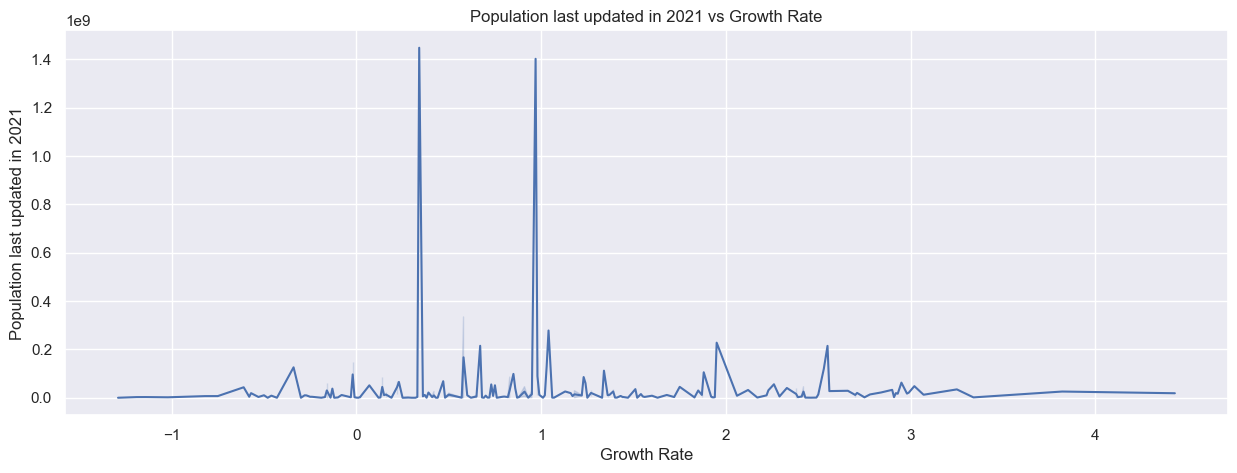

In [12]:
plt.figure(figsize=(15,5))
sns.lineplot(x='growth_rate',y='2021_last_updated',data=Population)
plt.title('Population last updated in 2021 vs Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Population last updated in 2021')
plt.show()

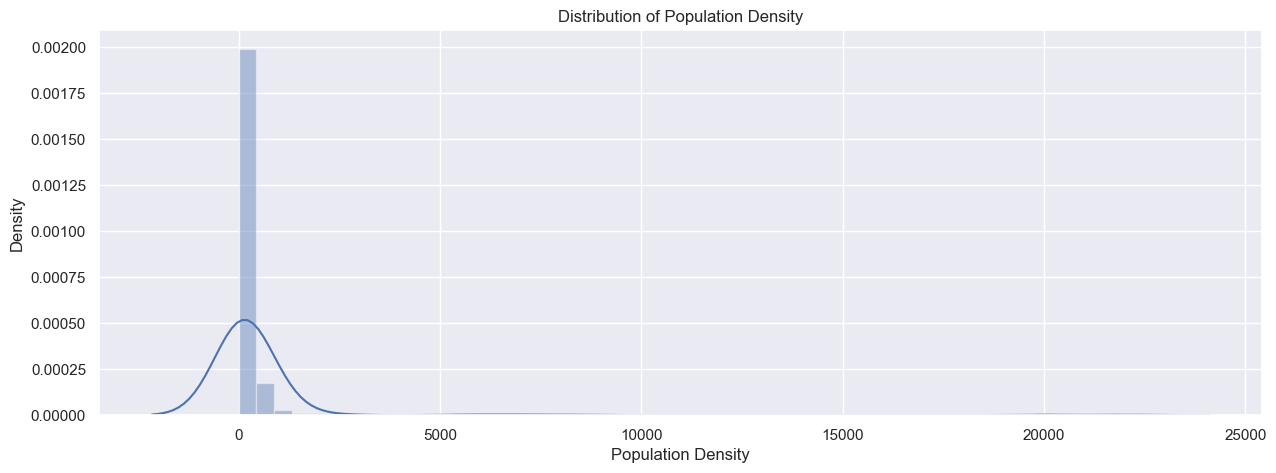

In [13]:
plt.figure(figsize=(15,5))
sns.distplot(Population['density_sq_km'])
plt.title('Distribution of Population Density')
plt.xlabel('Population Density')
plt.show()

In [14]:
Population['density_sq_km'].describe()

count      224.000000
mean       462.174107
std       2114.519435
min          0.000000
25%         35.750000
50%         95.500000
75%        240.000000
max      21946.000000
Name: density_sq_km, dtype: float64

In [15]:
Population[Population['density_sq_km'] == 21946.000000]

,country,2021_last_updated,area,density_sq_km,growth_rate,world_%,rank
163,Macau,663998,30,21946,1.4,0.01,167


In [16]:
Population['growth_rate'].describe()

count    224.000000
mean       1.057946
std        1.053640
min       -1.290000
25%        0.295000
50%        0.920000
75%        1.770000
max        4.430000
Name: growth_rate, dtype: float64

In [17]:
Population[Population['growth_rate'] == -1.290000]

,country,2021_last_updated,area,density_sq_km,growth_rate,world_%,rank
215,Wallis And Futuna,11094,142,78,-1.29,0.0,224


In [18]:
Population['2021_last_updated'].describe()

count    2.240000e+02
mean     3.491092e+07
std      1.396966e+08
min      8.000000e+02
25%      5.874492e+05
50%      6.046962e+06
75%      2.235544e+07
max      1.447065e+09
Name: 2021_last_updated, dtype: float64

In [19]:
Population[Population['2021_last_updated'] == 8.000000e+02]

,country,2021_last_updated,area,density_sq_km,growth_rate,world_%,rank
223,Vatican City,800,1,800,-0.12,0.0,232


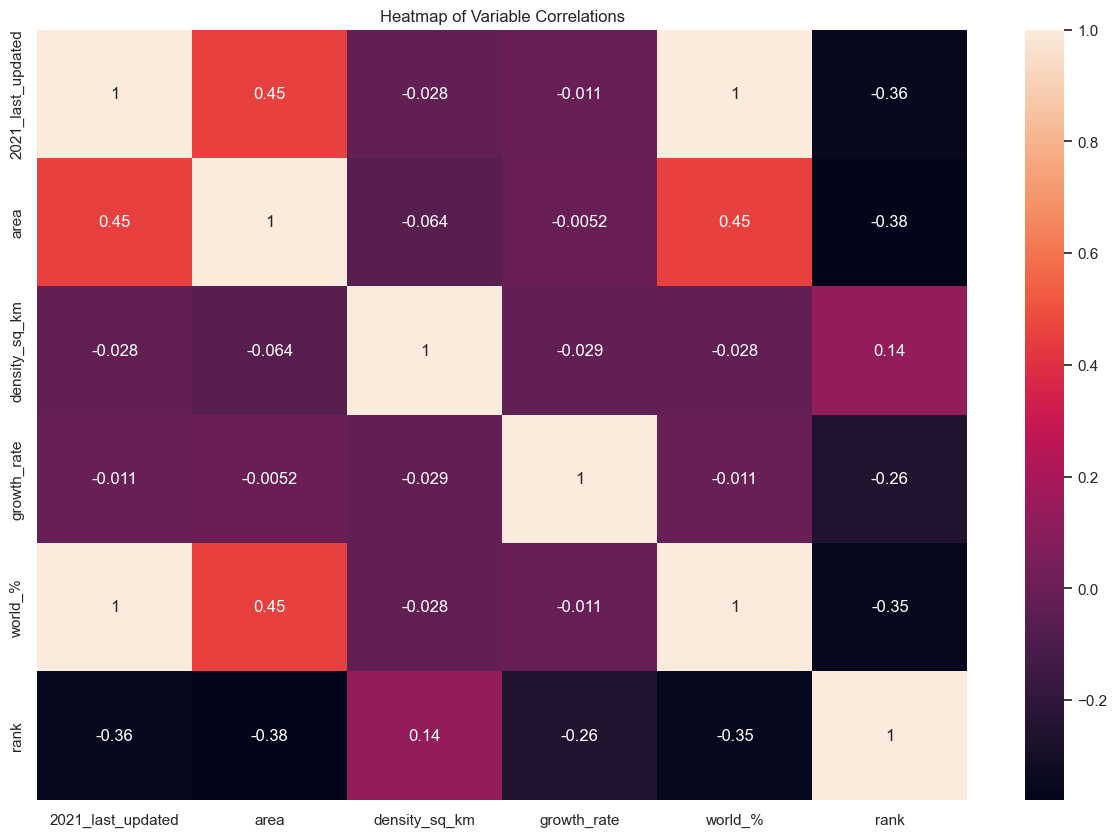

In [20]:
plt.figure(figsize=(15,10))
sns.heatmap(Population.corr(),annot=True)
plt.title('Heatmap of Variable Correlations')
plt.show()

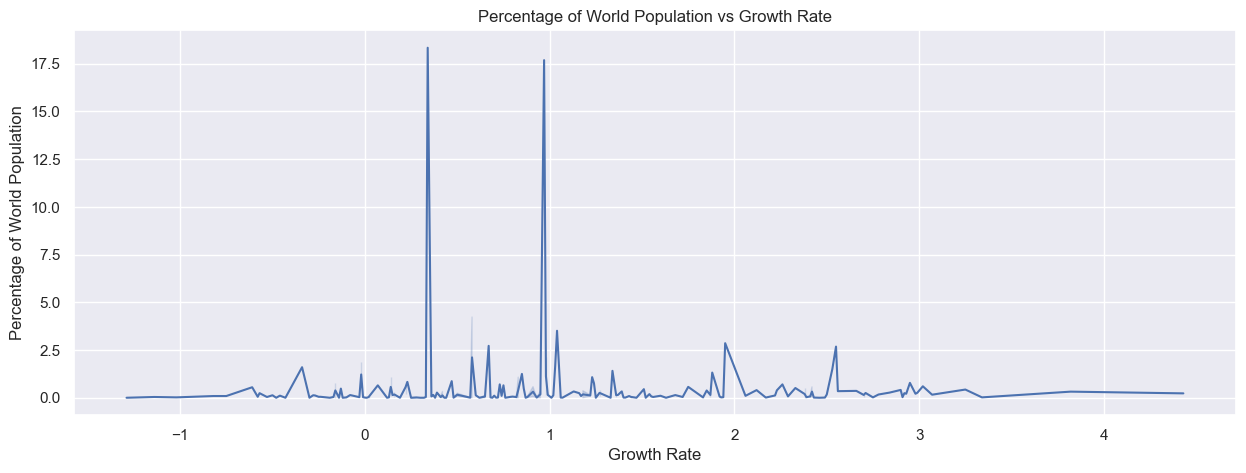

In [21]:
plt.figure(figsize=(15,5))
sns.lineplot(x='growth_rate',y='world_%',data=Population)
plt.title('Percentage of World Population vs Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Percentage of World Population')
plt.show()

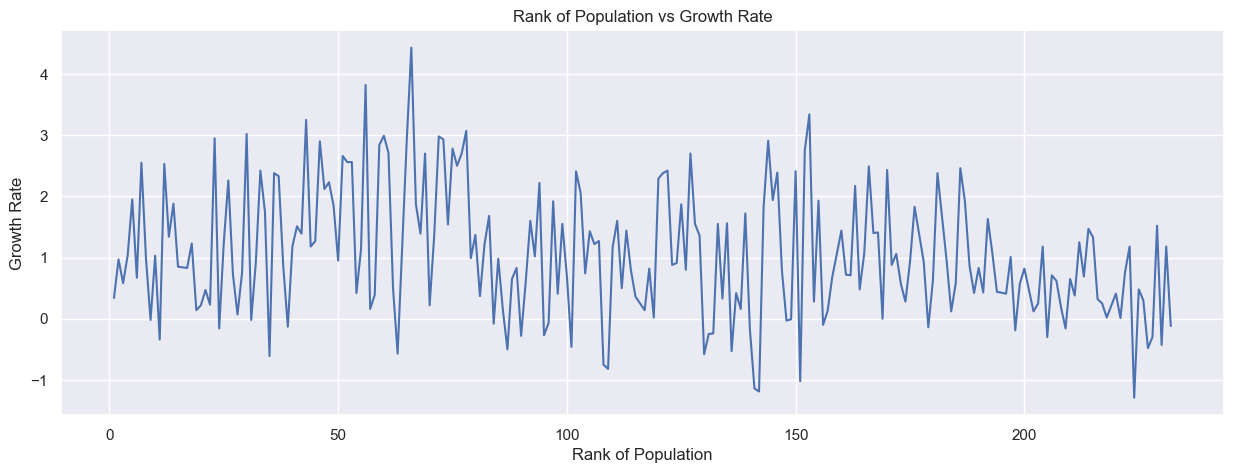

In [22]:
plt.figure(figsize=(15,5))
sns.lineplot(x='rank',y='growth_rate',data=Population)
plt.title('Rank of Population vs Growth Rate')
plt.xlabel('Rank of Population')
plt.ylabel('Growth Rate')
plt.show()

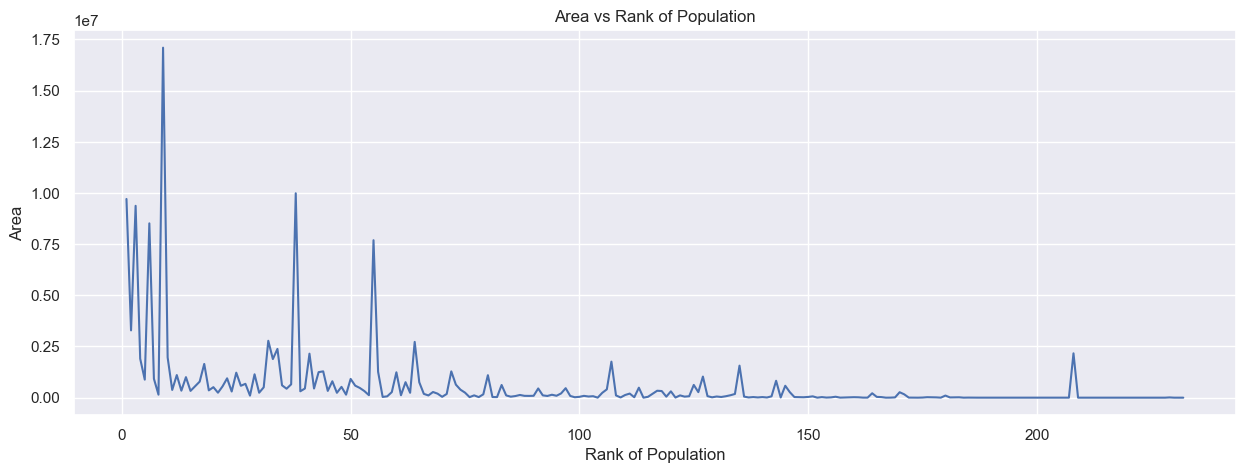

In [23]:
plt.figure(figsize=(15,5))
sns.lineplot(x='rank',y='area',data=Population)
plt.title('Area vs Rank of Population')
plt.xlabel('Rank of Population')
plt.ylabel('Area')
plt.show()

CLUSTER 
* paises con respecto a su poblacion, densidad y rangos de crecimiento

In [24]:
Population.head()

,country,2021_last_updated,area,density_sq_km,growth_rate,world_%,rank
0,China,1447065329,9706961,149,0.34,18.34,1
1,India,1401310563,3287590,424,0.97,17.69,2
2,United States,334058426,9372610,36,0.58,4.23,3
3,Indonesia,278037263,1904569,145,1.04,3.51,4
4,Pakistan,227724796,881912,255,1.95,2.86,5


* Anulando variables que no se usaran para el Clustering y Escalado

In [25]:
from sklearn.preprocessing import StandardScaler

In [26]:
Population_clust = Population.drop(['rank','country','area','world_%'],axis=1)
col = Population_clust.columns
scaler = StandardScaler()
Population_clust = scaler.fit_transform(Population_clust)
Population_clust = pd.DataFrame(Population_clust,columns=col)
Population_clust.head()

,2021_last_updated,density_sq_km,growth_rate
0,10.131368,-0.148438,-0.682923
1,9.803105,-0.018094,-0.083656
2,2.146205,-0.201998,-0.454631
3,1.744287,-0.150334,-0.017071
4,1.383325,-0.098196,0.848536


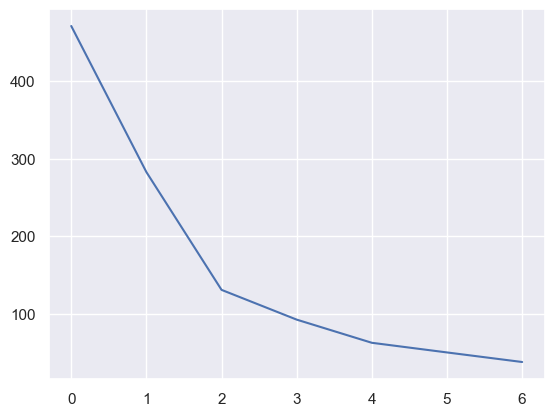

In [27]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
ssd = []
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Population_clust)
    
    ssd.append(kmeans.inertia_)
    
plt.plot(ssd)
plt.show()

In [28]:
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(Population_clust)
    
    cluster_labels = kmeans.labels_
    
    silhouette_avg = silhouette_score(Population_clust, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.8567314297814396
For n_clusters=3, the silhouette score is 0.8626025684116045
For n_clusters=4, the silhouette score is 0.5074953926466323
For n_clusters=5, the silhouette score is 0.4513046336578909
For n_clusters=6, the silhouette score is 0.47492114549646985
For n_clusters=7, the silhouette score is 0.49094344275768315
For n_clusters=8, the silhouette score is 0.45129804687765124


Particionando las ciudades en 4 clusters basados en su poblacion estadistica

In [29]:
kmeans = KMeans(n_clusters=4,max_iter=100)
kmeans.fit(Population_clust)

KMeans(max_iter=100, n_clusters=4)

In [30]:
Population['Cluster_ID'] = kmeans.labels_
Population.head()

,country,2021_last_updated,area,density_sq_km,growth_rate,world_%,rank,Cluster_ID
0,China,1447065329,9706961,149,0.34,18.34,1,2
1,India,1401310563,3287590,424,0.97,17.69,2,2
2,United States,334058426,9372610,36,0.58,4.23,3,1
3,Indonesia,278037263,1904569,145,1.04,3.51,4,1
4,Pakistan,227724796,881912,255,1.95,2.86,5,0


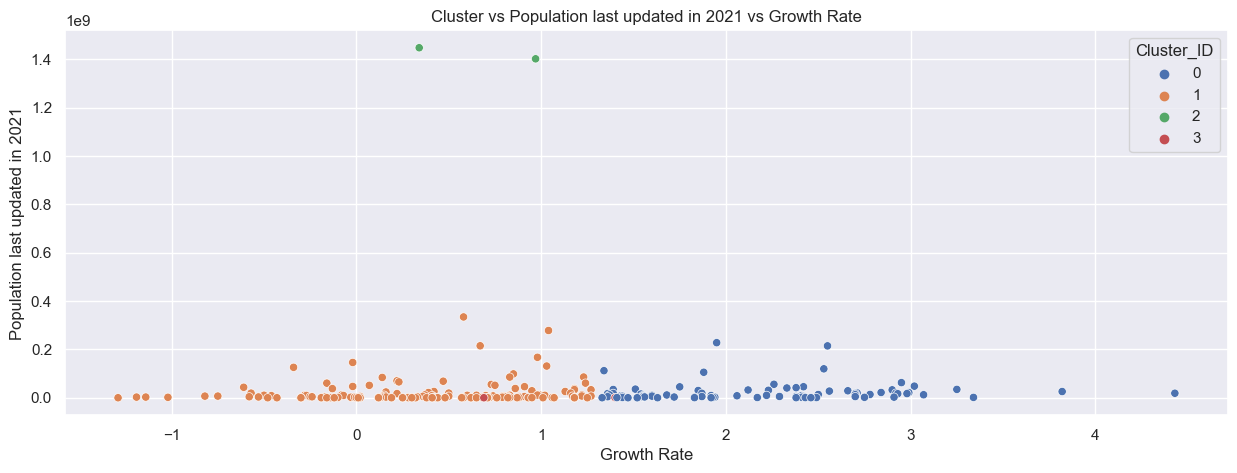

In [31]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='growth_rate',y='2021_last_updated',hue='Cluster_ID',palette='deep',data=Population)
plt.title('Cluster vs Population last updated in 2021 vs Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Population last updated in 2021')
plt.show()

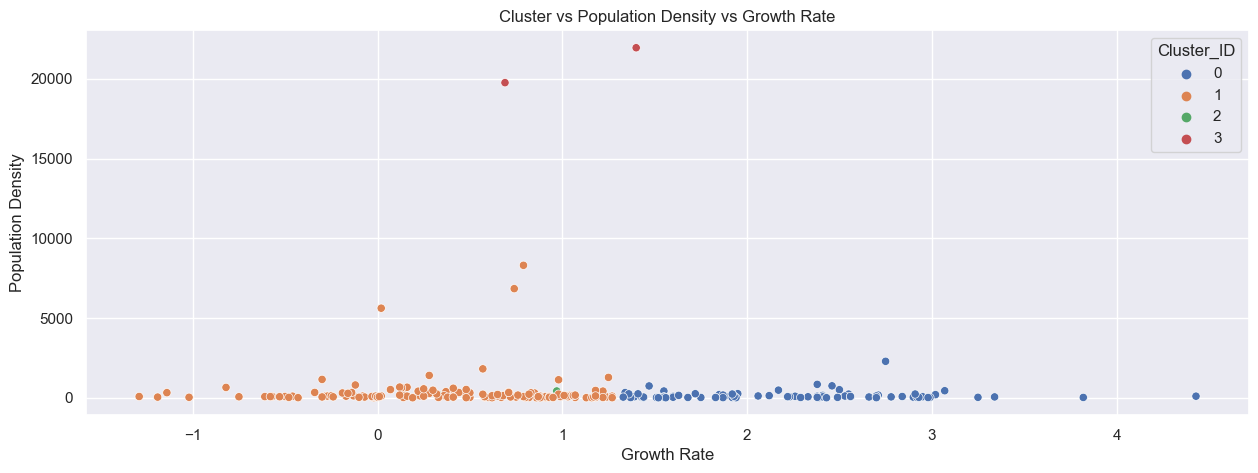

In [32]:
plt.figure(figsize=(15,5))
sns.scatterplot(x='growth_rate',y='density_sq_km',hue='Cluster_ID',palette='deep',data=Population)
plt.title('Cluster vs Population Density vs Growth Rate')
plt.xlabel('Growth Rate')
plt.ylabel('Population Density')
plt.show()

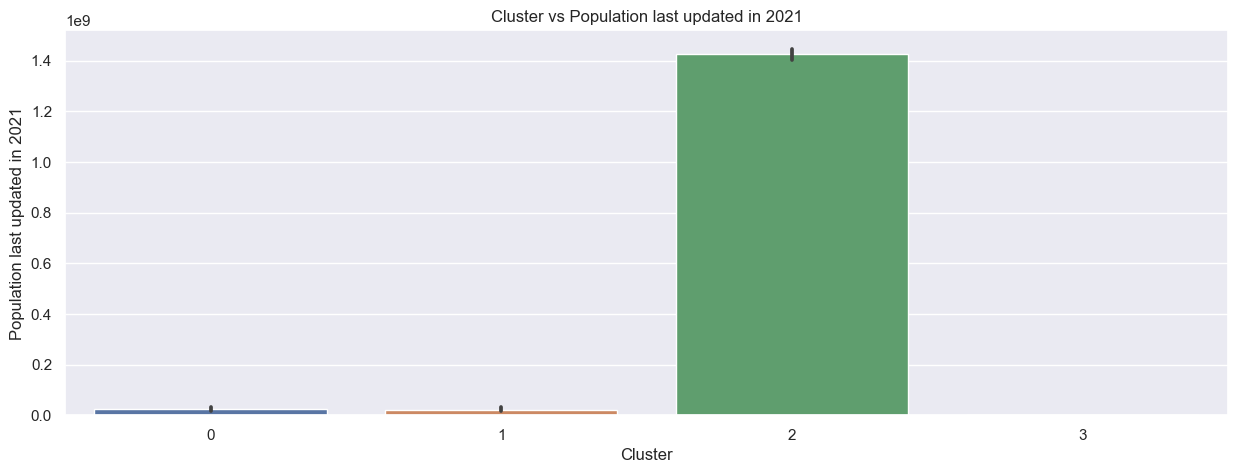

In [33]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='2021_last_updated',data=Population)
plt.title('Cluster vs Population last updated in 2021')
plt.xlabel('Cluster')
plt.ylabel('Population last updated in 2021')
plt.show()

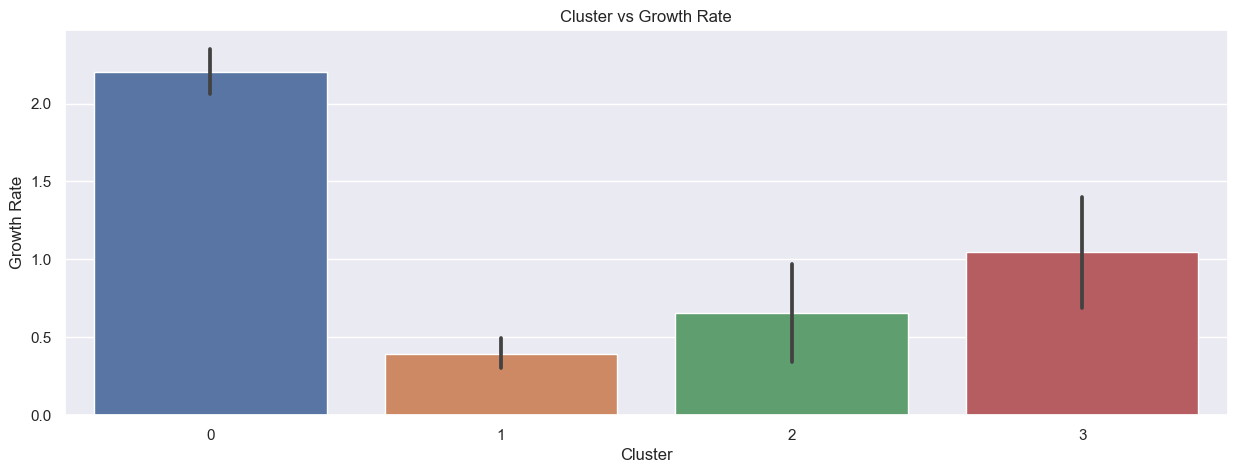

In [34]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='growth_rate',data=Population)
plt.title('Cluster vs Growth Rate')
plt.xlabel('Cluster')
plt.ylabel('Growth Rate')
plt.show()

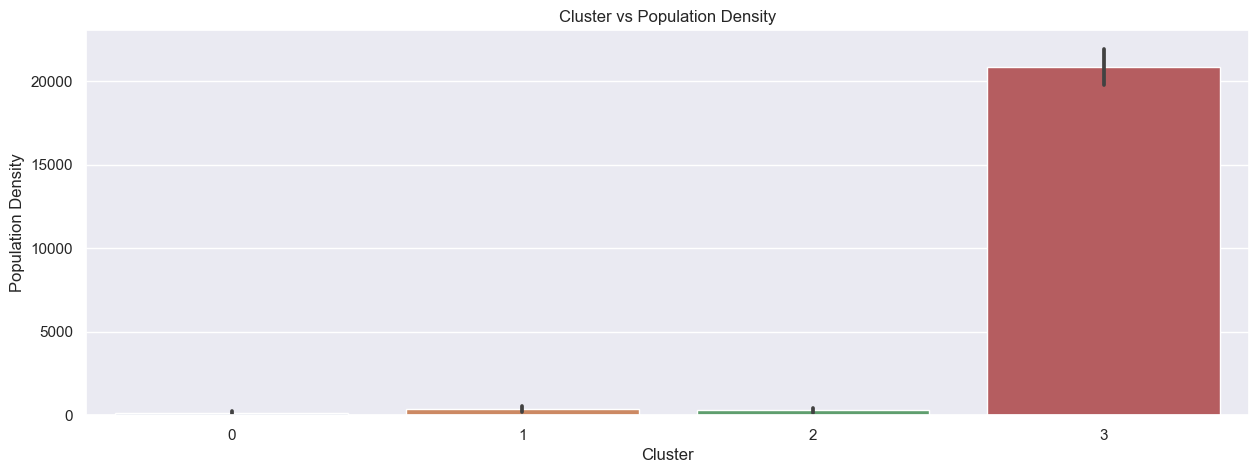

In [36]:
plt.figure(figsize=(15,5))
sns.barplot(x='Cluster_ID',y='density_sq_km',data=Population)
plt.title('Cluster vs Population Density')
plt.xlabel('Cluster')
plt.ylabel('Population Density')
plt.show()

IMPRIMIENDO LAS CIUDADES DE CADA CLUSTER

In [37]:
print('Cluster 1 :', list(Population[Population.Cluster_ID == 0].country))

Cluster 1 : ['Pakistan', 'Nigeria', 'Ethiopia', 'Philippines', 'Egypt', 'Tanzania', 'Kenya', 'Uganda', 'Sudan', 'Algeria', 'Iraq', 'Afghanistan', 'Saudi Arabia', 'Uzbekistan', 'Angola', 'Mozambique', 'Ghana', 'Yemen', 'Nepal', 'Madagascar', 'Cameroon', 'Ivory Coast', 'Niger', 'Burkina Faso', 'Mali', 'Malawi', 'Zambia', 'Syria', 'Guatemala', 'Ecuador', 'Senegal', 'Cambodia', 'Chad', 'Somalia', 'Zimbabwe', 'Guinea', 'Rwanda', 'Benin', 'Burundi', 'Bolivia', 'South Sudan', 'Honduras', 'Tajikistan', 'Papua New Guinea', 'Israel', 'Togo', 'Sierra Leone', 'Laos', 'Kyrgyzstan', 'Turkmenistan', 'Oman', 'Palestine', 'Liberia', 'Central African Republic', 'Mauritania', 'Panama', 'Kuwait', 'Eritrea', 'Mongolia', 'Qatar', 'Namibia', 'Gambia', 'Botswana', 'Gabon', 'Guinea Bissau', 'Bahrain', 'Equatorial Guinea', 'Timor Leste', 'Djibouti', 'Comoros', 'Solomon Islands', 'Luxembourg', 'Western Sahara', 'Belize', 'Vanuatu', 'Mayotte', 'Sao Tome And Principe', 'Kiribati', 'Saint Martin', 'Turks And Caicos

In [38]:
print('Cluster 2 :', list(Population[Population.Cluster_ID == 1].country))

Cluster 2 : ['United States', 'Indonesia', 'Brazil', 'Bangladesh', 'Russia', 'Mexico', 'Japan', 'Vietnam', 'Turkey', 'Iran', 'Germany', 'Thailand', 'United Kingdom', 'France', 'Italy', 'South Africa', 'Myanmar', 'South Korea', 'Colombia', 'Spain', 'Argentina', 'Ukraine', 'Canada', 'Poland', 'Morocco', 'Peru', 'Malaysia', 'Venezuela', 'North Korea', 'Australia', 'Taiwan', 'Sri Lanka', 'Chile', 'Romania', 'Kazakhstan', 'Netherlands', 'Tunisia', 'Belgium', 'Haiti', 'Cuba', 'Dominican Republic', 'Czech Republic', 'Greece', 'Jordan', 'Azerbaijan', 'Portugal', 'Sweden', 'United Arab Emirates', 'Hungary', 'Belarus', 'Austria', 'Switzerland', 'Serbia', 'Hong Kong', 'Paraguay', 'Libya', 'Bulgaria', 'Lebanon', 'Nicaragua', 'El Salvador', 'Singapore', 'Denmark', 'Finland', 'Norway', 'Slovakia', 'Costa Rica', 'Ireland', 'New Zealand', 'Croatia', 'Moldova', 'Georgia', 'Uruguay', 'Bosnia And Herzegovina', 'Jamaica', 'Armenia', 'Albania', 'Puerto Rico', 'Lithuania', 'Lesotho', 'North Macedonia', 'Slo

In [39]:
print('Cluster 3 :', list(Population[Population.Cluster_ID == 2].country))

Cluster 3 : ['China', 'India']


In [40]:
print('Cluster 4 :', list(Population[Population.Cluster_ID == 3].country))

Cluster 4 : ['Macau', 'Monaco']


ANALISIS SERIE TIEMPO

In [42]:
Population_time_series = pd.read_csv('../../Data/USAR/timeseries_population_count.csv')
Population_time_series.head()

,iso_code,country,current_population,updated_datetime
0,CHN,China,"1,443,839,846",2021-06-02 12:55:28.499834
1,IND,India,"1,392,365,583",2021-06-02 12:55:28.499834
2,USA,United States,"332,764,085",2021-06-02 12:55:28.499834
3,IDN,Indonesia,"276,140,523",2021-06-02 12:55:28.499834
4,PAK,Pakistan,"224,866,511",2021-06-02 12:55:28.499834


INSPECCION DE DATOS Y LIMPIEZA


In [43]:
Population_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56460 entries, 0 to 56459
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   iso_code            56460 non-null  object
 1   country             56460 non-null  object
 2   current_population  56460 non-null  object
 3   updated_datetime    56460 non-null  object
dtypes: object(4)
memory usage: 1.7+ MB


In [44]:
Population_time_series['current_population'] = Population_time_series['current_population'].apply(lambda x: int(x.replace(',','')))
Population_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56460 entries, 0 to 56459
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   iso_code            56460 non-null  object
 1   country             56460 non-null  object
 2   current_population  56460 non-null  int64 
 3   updated_datetime    56460 non-null  object
dtypes: int64(1), object(3)
memory usage: 1.7+ MB


In [45]:
Population_time_series['updated_datetime'] =  pd.to_datetime(Population_time_series['updated_datetime'], format='%Y-%m-%d %H:%M:%S.%f')
Population_time_series.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56460 entries, 0 to 56459
Data columns (total 4 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   iso_code            56460 non-null  object        
 1   country             56460 non-null  object        
 2   current_population  56460 non-null  int64         
 3   updated_datetime    56460 non-null  datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 1.7+ MB


In [46]:
Population_time_series['updated_datetime'].dtype

dtype('<M8[ns]')

LA DATA FUE DIVIDIDA EN PAISES TOMAREMOS UN PAIS DE REFERENCIA, LA INDIA

In [47]:
Population_time_series_India = Population_time_series[Population_time_series.country == 'India']
Population_time_series_India = Population_time_series_India[['current_population','updated_datetime']]
Population_time_series_India.head()

,current_population,updated_datetime
1,1392365583,2021-06-02 12:55:28.499834
229,1392401845,2021-06-03 12:39:45.359468
457,1392438885,2021-06-04 12:54:36.404126
685,1392475166,2021-06-05 12:39:39.550830
913,1392511820,2021-06-06 12:39:20.804163


In [48]:
Population_time_series_India.set_index('updated_datetime',inplace=True)
Population_time_series_India.head()

,current_population
updated_datetime,
2021-06-02 12:55:28.499834,1392365583
2021-06-03 12:39:45.359468,1392401845
2021-06-04 12:54:36.404126,1392438885
2021-06-05 12:39:39.550830,1392475166
2021-06-06 12:39:20.804163,1392511820


VISUALIZACION DE LA DATA

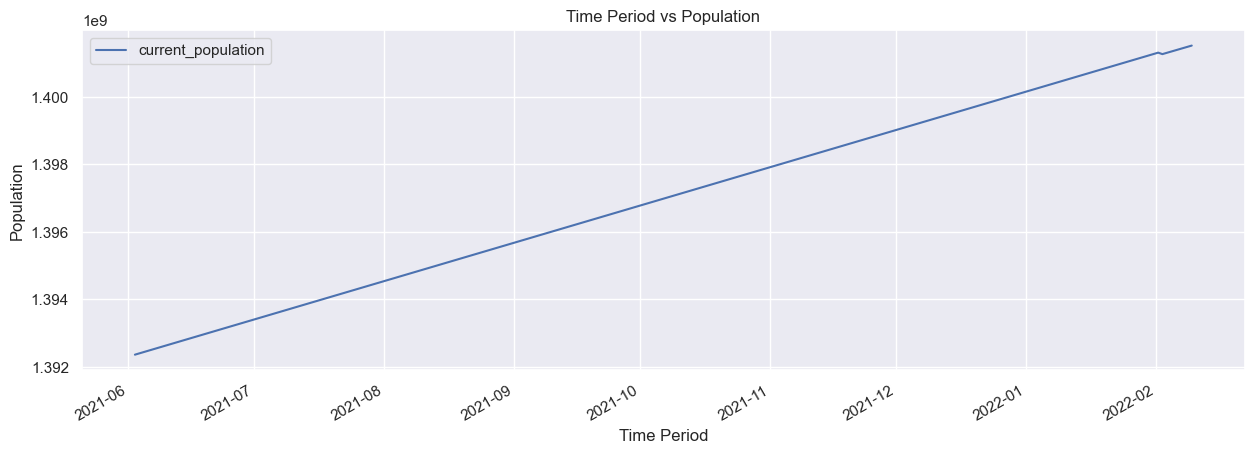

In [49]:
Population_time_series_India.plot(figsize=(15,5))
plt.title('Time Period vs Population')
plt.xlabel('Time Period')
plt.ylabel('Population')
plt.show()

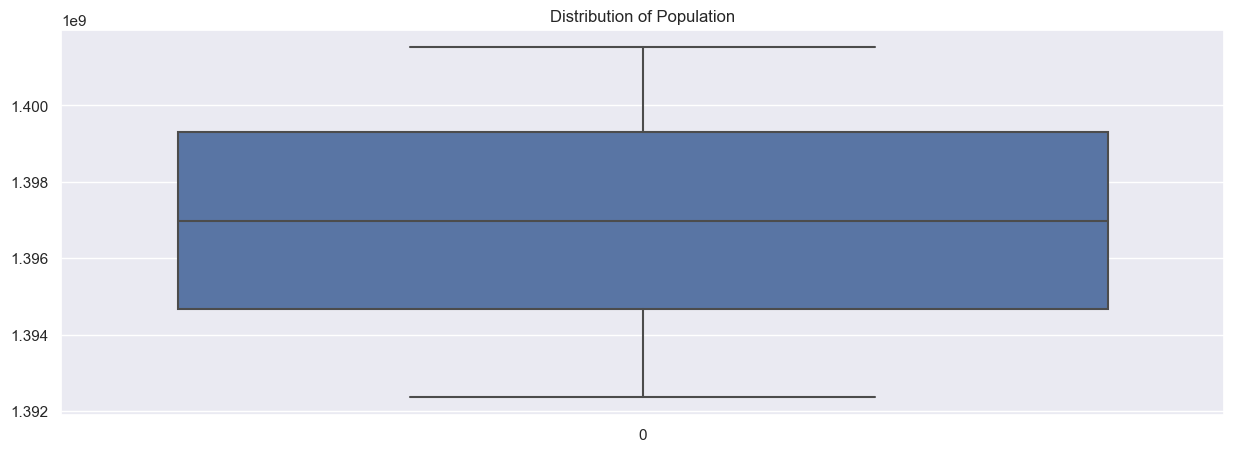

In [50]:
plt.figure(figsize=(15,5))
sns.boxplot(Population_time_series_India['current_population'])
plt.title('Distribution of Population')
plt.show()

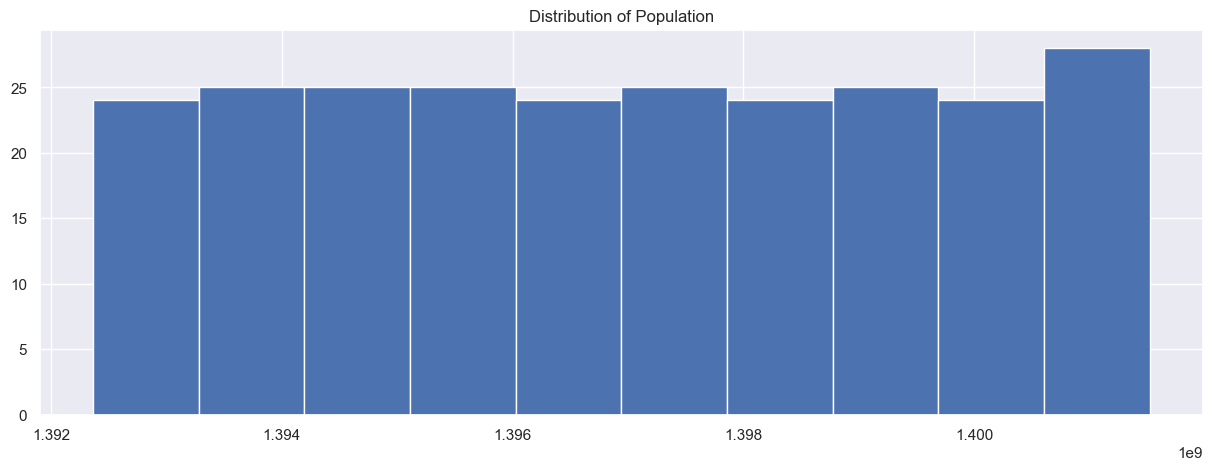

In [51]:
plt.figure(figsize=(15,5))
plt.hist(Population_time_series_India['current_population'])
plt.title('Distribution of Population')
plt.show()

DESCOMPOCION DE LAS SERIES DE TIEMPO

In [52]:
from pylab import rcParams
import statsmodels.api as sm

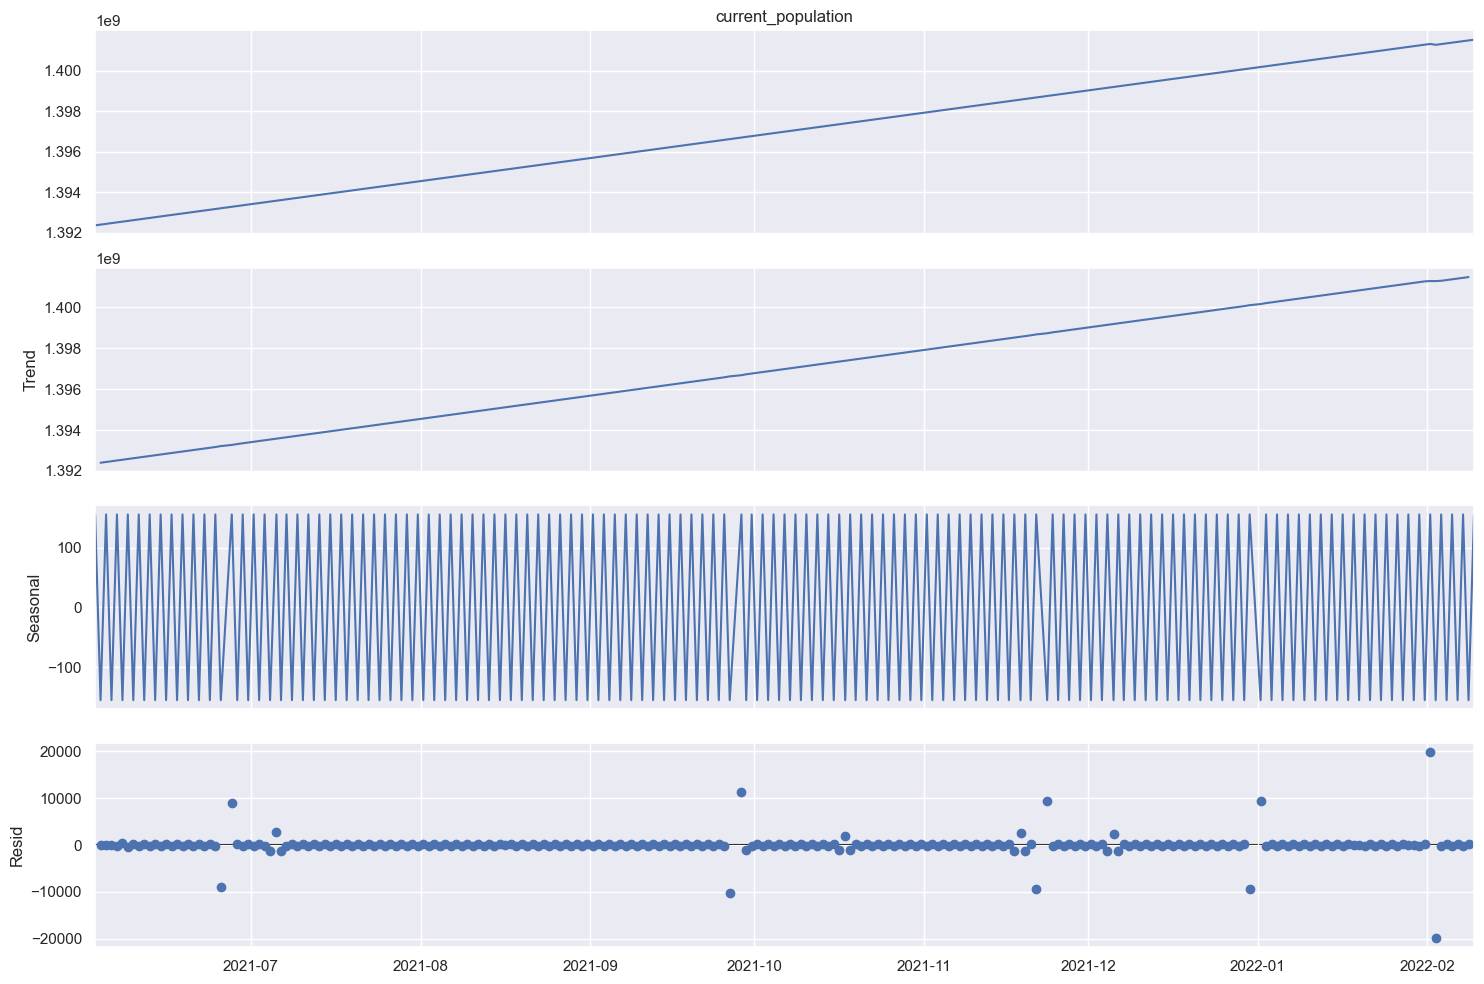

In [53]:
rcParams['figure.figsize'] = 15,10
decomposition = sm.tsa.seasonal_decompose(Population_time_series_India['current_population'],model='additive',period=2)
decomposition.plot()
plt.show()

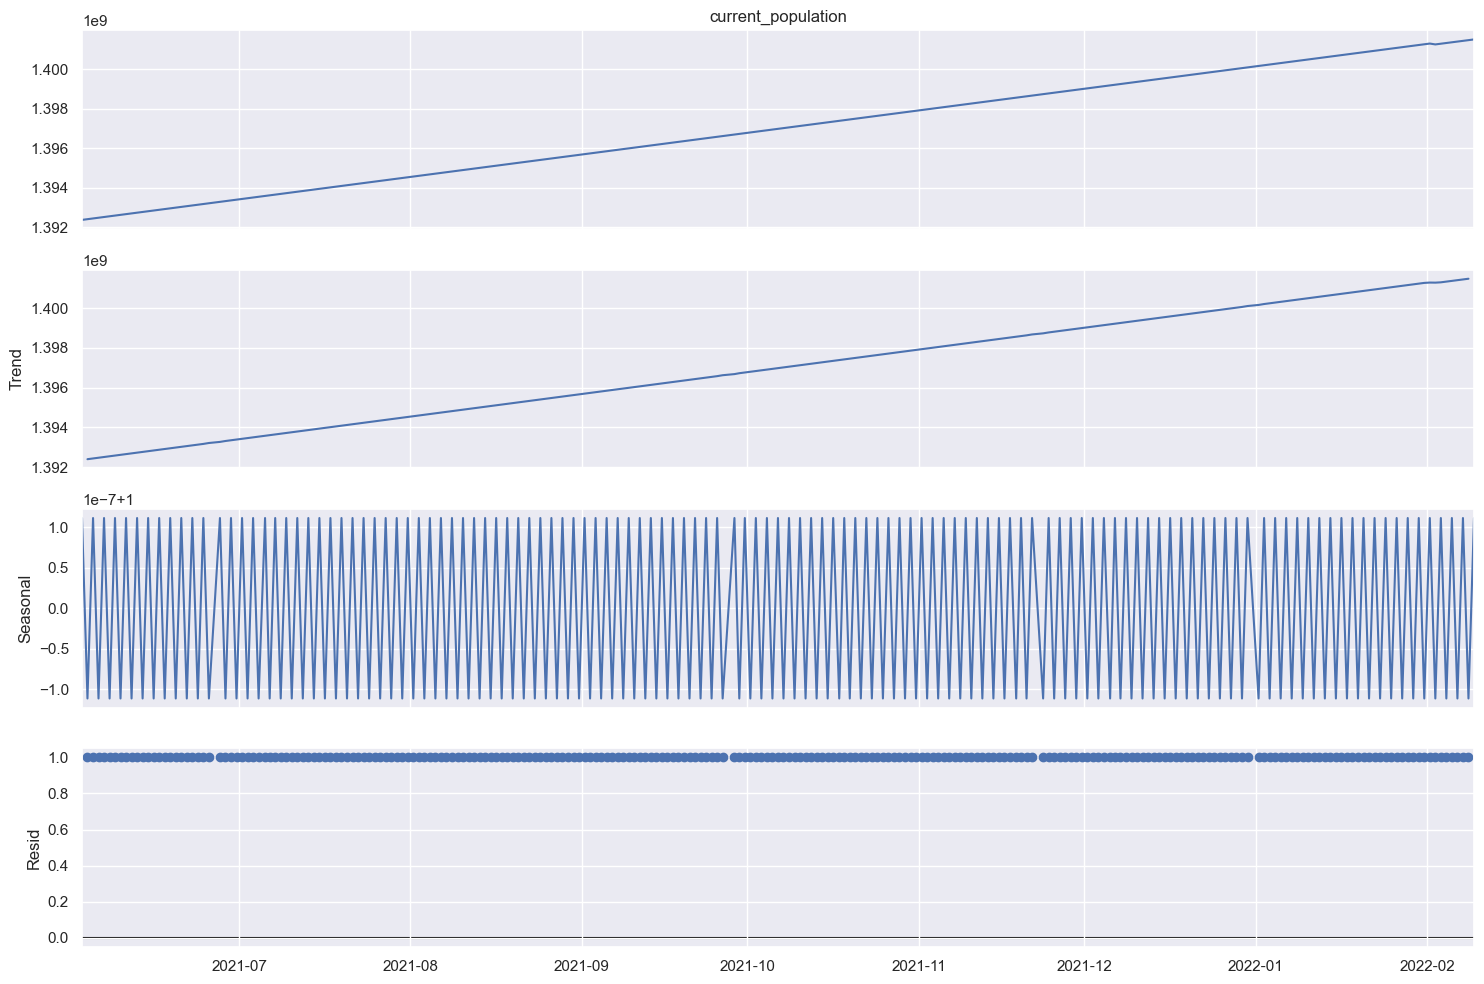

In [54]:
decomposition = sm.tsa.seasonal_decompose(Population_time_series_India['current_population'],model='multiplicative',period=2)
decomposition.plot()
plt.show()

CONSTRUCCION DEL MODELO

In [55]:
Population_time_series_India.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 249 entries, 2021-06-02 12:55:28.499834 to 2022-02-09 12:33:46.682574
Data columns (total 1 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   current_population  249 non-null    int64
dtypes: int64(1)
memory usage: 3.9 KB


In [56]:
train_size=160
train = Population_time_series_India[0:train_size]
test = Population_time_series_India[train_size:]

In [57]:
train.head()

,current_population
updated_datetime,
2021-06-02 12:55:28.499834,1392365583
2021-06-03 12:39:45.359468,1392401845
2021-06-04 12:54:36.404126,1392438885
2021-06-05 12:39:39.550830,1392475166
2021-06-06 12:39:20.804163,1392511820


In [58]:
test.tail()

,current_population
updated_datetime,
2022-02-05 12:25:56.736764,1401375221
2022-02-06 12:31:28.403963,1401411492
2022-02-07 12:33:45.429985,1401447681
2022-02-08 12:32:49.295078,1401483789
2022-02-09 12:33:46.682574,1401519945


PORCENTAJE SIMPLE

In [59]:
forceast_frame = Population_time_series_India.copy()
ma_window = 7
forceast_frame['forecast'] = Population_time_series_India['current_population'].rolling(ma_window).mean()
forceast_frame['forecast'][train_size:] = forceast_frame['forecast'][train_size-1]

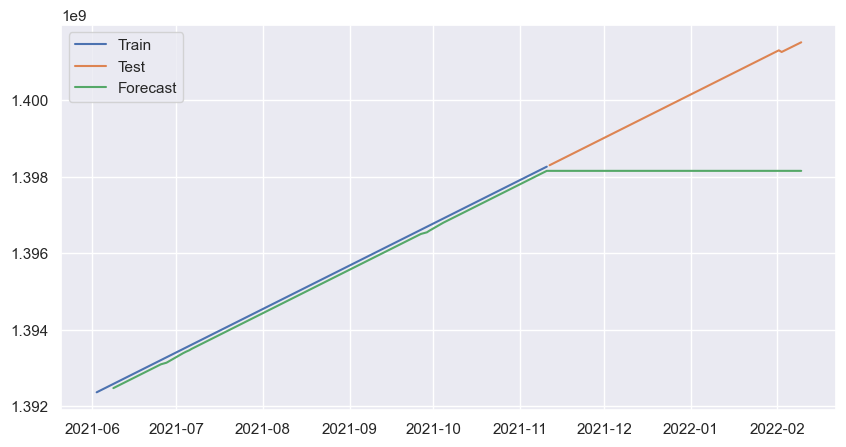

In [60]:
plt.figure(figsize=(10,5))
plt.plot(train['current_population'],label='Train')
plt.plot(test['current_population'],label='Test')
plt.plot(forceast_frame['forecast'],label='Forecast')
plt.legend(loc='best')
plt.show()

In [61]:
from sklearn.metrics import mean_squared_error
rmse = np.sqrt(mean_squared_error(test['current_population'], forceast_frame['forecast'][train_size:])).round(2)
mape = np.round(np.mean(np.abs(test['current_population']-forceast_frame['forecast'][train_size:])/test['current_population'])*100,2)
print(rmse)
print(mape)

2037750.58
0.13


METODO CON ENTRENAMIENTO

In [62]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

In [63]:
model = ExponentialSmoothing(np.asarray(train['current_population']),seasonal_periods=7,trend='additive',seasonal=None)
model_fit = model.fit(smoothing_level=0.2,smoothing_slope=0.01,optimized=False)
forceast_frame = test.copy()
forceast_frame['forecast'] = model_fit.forecast(len(test))

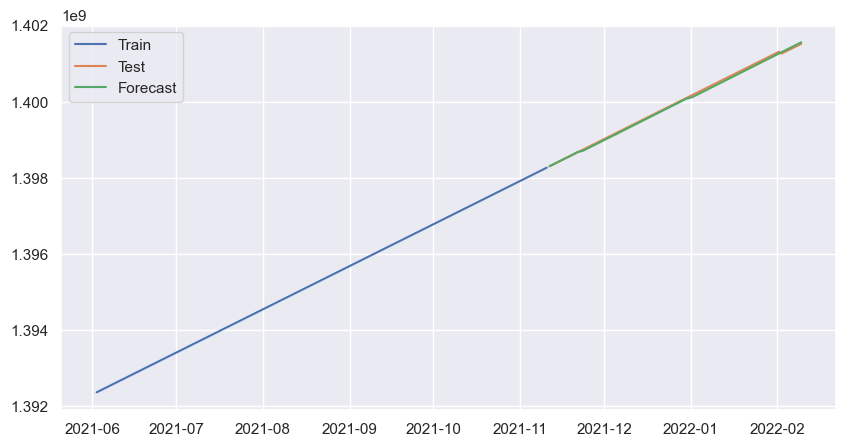

In [64]:
plt.figure(figsize=(10,5))
plt.plot(train['current_population'],label='Train')
plt.plot(test['current_population'],label='Test')
plt.plot(forceast_frame['forecast'],label='Forecast')
plt.legend(loc='best')
plt.show()

In [65]:
rmse = np.sqrt(mean_squared_error(test['current_population'], forceast_frame['forecast'])).round(2)
mape = np.round(np.mean(np.abs(test['current_population']-forceast_frame['forecast'])/test['current_population'])*100,2)
print(rmse)
print(mape)

36515.34
0.0
